In [83]:
import uproot
import os
import glob
import numpy as np
import pandas as pd
import uproot_methods
import geeksw.plotting.cmsplot as plt
from matplotlib import gridspec

from wvz_helpers import load_dataframes, load_dataframe, yields_map, skims
from syncronization import load_philips_yields
import wvz_plotting

import scipy.stats

In [2]:
df = load_dataframes(["wwz", "ttz", "zz", "nonh_wwz", "zh_wwz"], concat=True)

In [3]:
df_offz_train = df.query("is_ChannelOffZ and used_for_OffZ_training")
df_offz_test = df.query("is_ChannelOffZ and not used_for_OffZ_training")

In [4]:
df_emu_train = df.query("is_ChannelEMu and used_for_EMu_training")
df_emu_test = df.query("is_ChannelEMu and not used_for_EMu_training")

In [96]:
df_btagemu_train = df.query("is_ChannelBTagEMu and used_for_EMu_training")
df_btagemu_test = df.query("is_ChannelBTagEMu and not used_for_EMu_training")

Doing OffZ WWZ vs ZZ BDT score...
KS test for WWZ:
Ks_2sampResult(statistic=0.008785869160584298, pvalue=1.160842210467044e-06)
KS test for ZZ:
Ks_2sampResult(statistic=0.0030166298716867157, pvalue=0.014436537494184354)


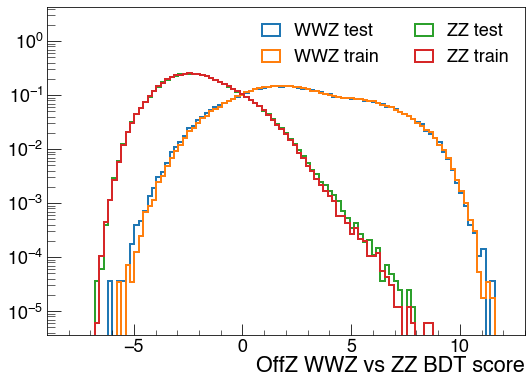

Doing EMu WWZ vs ZZ BDT score...
KS test for WWZ:
Ks_2sampResult(statistic=0.001609981144074249, pvalue=0.9565909957638306)
KS test for ZZ:
Ks_2sampResult(statistic=0.024352349231715142, pvalue=0.0013438437430795343)


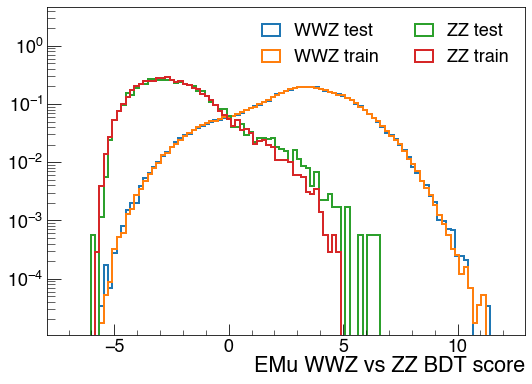

Doing EMu WWZ vs ttZ BDT score...
KS test for WWZ:
Ks_2sampResult(statistic=0.003262788912923087, pvalue=0.2341108939691698)
KS test for ttZ:
Ks_2sampResult(statistic=0.03507119166934695, pvalue=0.4765113738311545)


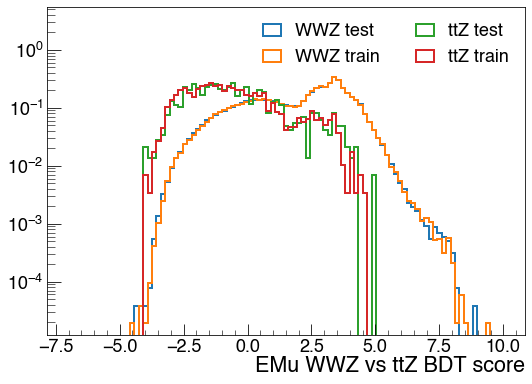

Doing BTagEMu WWZ vs ttZ BDT score...
KS test for WWZ:


ValueError: Data passed to ks_2samp must not be empty

In [97]:
hist_args = dict(histtype='step', density=True, lw=2)

def hist(df, col, **kwargs):
    plt.hist(df[col], weights=None, **kwargs, **hist_args)

bins = np.linspace(-8, 12, 100)

print("Doing OffZ WWZ vs ZZ BDT score...")
print("KS test for WWZ:")
print(scipy.stats.ks_2samp(df_offz_test.query('sample == "wwz"')["bdt_OffZ_wwz_vs_zz"],
                           df_offz_train.query('sample == "wwz"')["bdt_OffZ_wwz_vs_zz"]))
print("KS test for ZZ:")
print(scipy.stats.ks_2samp(df_offz_test.query('sample == "zz"')["bdt_OffZ_wwz_vs_zz"],
                           df_offz_train.query('sample == "zz"')["bdt_OffZ_wwz_vs_zz"]))

plt.figure()
plt.yscale('log', nonposy='clip')
hist(df_offz_test.query('sample == "wwz"'), "bdt_OffZ_wwz_vs_zz", label="WWZ test", bins=bins)
hist(df_offz_train.query('sample == "wwz"'), "bdt_OffZ_wwz_vs_zz", label="WWZ train", bins=bins)
hist(df_offz_test.query('sample == "zz"'), "bdt_OffZ_wwz_vs_zz", label="ZZ test", bins=bins)
hist(df_offz_train.query('sample == "zz"'), "bdt_OffZ_wwz_vs_zz", label="ZZ train", bins=bins)
plt.legend(loc="upper right", ncol=2)
plt.ylim(plt.ylim()[0], 10*plt.ylim()[1])
plt.xlabel("OffZ WWZ vs ZZ BDT score")
plt.savefig("plots/bdt_scores/bdt_OffZ_wwz_vs_zz.pdf")
plt.savefig("plots/bdt_scores/bdt_OffZ_wwz_vs_zz.png", dpi=300)
plt.show()

bins = np.linspace(-7, 12, 100)

print("Doing EMu WWZ vs ZZ BDT score...")
print("KS test for WWZ:")
print(scipy.stats.ks_2samp(df_emu_test.query('sample == "wwz"')["bdt_EMu_wwz_vs_zz"],
                           df_emu_train.query('sample == "wwz"')["bdt_EMu_wwz_vs_zz"]))
print("KS test for ZZ:")
print(scipy.stats.ks_2samp(df_emu_test.query('sample == "zz"')["bdt_EMu_wwz_vs_zz"],
                           df_emu_train.query('sample == "zz"')["bdt_EMu_wwz_vs_zz"]))


plt.figure()
plt.yscale('log', nonposy='clip')
hist(df_emu_test.query('sample == "wwz"'), "bdt_EMu_wwz_vs_zz", label="WWZ test", bins=bins)
hist(df_emu_train.query('sample == "wwz"'), "bdt_EMu_wwz_vs_zz", label="WWZ train", bins=bins)
hist(df_emu_test.query('sample == "zz"'), "bdt_EMu_wwz_vs_zz", label="ZZ test", bins=bins)
hist(df_emu_train.query('sample == "zz"'), "bdt_EMu_wwz_vs_zz", label="ZZ train", bins=bins)
plt.legend(loc="upper right", ncol=2)
plt.ylim(plt.ylim()[0], 10*plt.ylim()[1])
plt.xlabel("EMu WWZ vs ZZ BDT score")
plt.savefig("plots/bdt_scores/bdt_EMu_wwz_vs_zz.pdf")
plt.savefig("plots/bdt_scores/bdt_EMu_wwz_vs_zz.png", dpi=300)
plt.show()

bins = np.linspace(-7, 10, 100)

print("Doing EMu WWZ vs ttZ BDT score...")
print("KS test for WWZ:")
print(scipy.stats.ks_2samp(df_emu_test.query('sample == "wwz"')["bdt_EMu_wwz_vs_ttz"],
                           df_emu_train.query('sample == "wwz"')["bdt_EMu_wwz_vs_ttz"]))
print("KS test for ttZ:")
print(scipy.stats.ks_2samp(df_emu_test.query('sample == "ttz"')["bdt_EMu_wwz_vs_ttz"],
                           df_emu_train.query('sample == "ttz"')["bdt_EMu_wwz_vs_ttz"]))


plt.figure()
plt.yscale('log', nonposy='clip')
hist(df_emu_test.query('sample == "wwz"'), "bdt_EMu_wwz_vs_ttz", label="WWZ test", bins=bins)
hist(df_emu_train.query('sample == "wwz"'), "bdt_EMu_wwz_vs_ttz", label="WWZ train", bins=bins)
hist(df_emu_test.query('sample == "ttz"'), "bdt_EMu_wwz_vs_ttz", label="ttZ test", bins=bins)
hist(df_emu_train.query('sample == "ttz"'), "bdt_EMu_wwz_vs_ttz", label="ttZ train", bins=bins)
plt.legend(loc="upper right", ncol=2)
plt.ylim(plt.ylim()[0], 10*plt.ylim()[1])
plt.xlabel("EMu WWZ vs ttZ BDT score")
plt.savefig("plots/bdt_scores/bdt_EMu_wwz_vs_ttz.pdf")
plt.savefig("plots/bdt_scores/bdt_EMu_wwz_vs_ttz.png", dpi=300)
plt.show()



Doing BTagEMu WWZ vs ttZ BDT score...
KS test for ttZ:
Ks_2sampResult(statistic=0.011905979143879919, pvalue=0.20874617920666183)


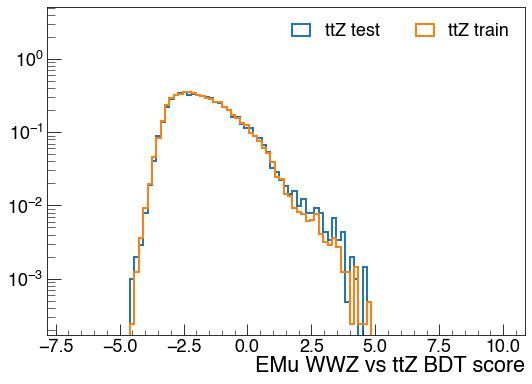

In [100]:
print("Doing BTagEMu WWZ vs ttZ BDT score...")
print("KS test for ttZ:")
print(scipy.stats.ks_2samp(df_btagemu_test.query('sample == "ttz"')["bdt_EMu_wwz_vs_ttz"],
                           df_btagemu_train.query('sample == "ttz"')["bdt_EMu_wwz_vs_ttz"]))


plt.figure()
plt.yscale('log', nonposy='clip')
hist(df_btagemu_test.query('sample == "ttz"'), "bdt_EMu_wwz_vs_ttz", label="ttZ test", bins=bins)
hist(df_btagemu_train.query('sample == "ttz"'), "bdt_EMu_wwz_vs_ttz", label="ttZ train", bins=bins)
plt.legend(loc="upper right", ncol=2)
plt.ylim(plt.ylim()[0], 10*plt.ylim()[1])
plt.xlabel("EMu WWZ vs ttZ BDT score")
plt.savefig("plots/bdt_scores/bdt_BTagEMu_wwz_vs_ttz.pdf")
plt.savefig("plots/bdt_scores/bdt_BTagEMu_wwz_vs_ttz.png", dpi=300)
plt.show()